In [1]:
import tensorflow as tf
import keras 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
import os
import glob
import h5py
from PIL import Image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam , SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
import numpy as np

In [5]:
#!unzip "/content/drive/MyDrive/dataset folder/dataset.zip" -d "/content/drive/MyDrive/dataset folder/"

In [ ]:
#path_root = "/content/drive/MyDrive/Brain Tumor Project/Brain tumor"

#from keras.preprocessing.image import ImageDataGenerator
#batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(224, 224),batch_size=1952)

Found 1952 images belonging to 2 classes.


In [8]:
batch_size = 32         #  was 16 for validation

train_images = '/content/drive/MyDrive/dataset folder/dataset/training'
test_images = '/content/drive/MyDrive/dataset folder/dataset/testing'

Train_Datagen = ImageDataGenerator(
               preprocessing_function= preprocess_input, horizontal_flip = True )

val_Datagen = ImageDataGenerator(
                preprocessing_function= preprocess_input )

train_data = Train_Datagen.flow_from_directory( train_images, target_size = (256, 256),
                                              batch_size =batch_size)

batches = val_Datagen.flow_from_directory( test_images, target_size = (256, 256),
                                             batch_size = 819)

Found 1309 images belonging to 2 classes.
Found 819 images belonging to 2 classes.


In [10]:
batches.class_indices

{'normal': 0, 'schizophrenia': 1}

In [11]:
imgs, labels = next(batches)


In [12]:
print(imgs.shape)
print(labels.shape)

(819, 256, 256, 3)
(819, 2)


In [15]:
from sklearn.model_selection import train_test_split
# Train, validation and test split

X_val, X_test, y_val, y_test = train_test_split(imgs, labels, test_size=0.50, random_state=7)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [16]:
#print("*-*-*-*-*-*")
#print("Train")
#print(X_train.shape)
#print(y_train.shape)


print("*-*-*-*-*-*")
print("Validation")
print(X_val.shape)
print(y_val.shape)

print("*-*-*-*-*-*")
print("Test")
print(X_test.shape)
print(y_test.shape)

*-*-*-*-*-*
Validation
(409, 256, 256, 3)
(409, 2)
*-*-*-*-*-*
Test
(410, 256, 256, 3)
(410, 2)


In [20]:
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization


In [32]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 30, 30, 128)     

In [33]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [34]:
history = model.fit(train_data,
                    validation_data = (X_val, y_val) ,
                    batch_size = 32, 
                    epochs = 20)

Epoch 1/20
41/41 [==============================] - 6s 133ms/step - loss: 4.5427 - accuracy: 0.8358 - val_loss: 0.3831 - val_accuracy: 0.7653
Epoch 2/20
41/41 [==============================] - 5s 114ms/step - loss: 0.6111 - accuracy: 0.9213 - val_loss: 0.3976 - val_accuracy: 0.8533
Epoch 3/20
41/41 [==============================] - 5s 114ms/step - loss: 0.3425 - accuracy: 0.9565 - val_loss: 0.0674 - val_accuracy: 0.9707
Epoch 4/20
41/41 [==============================] - 5s 114ms/step - loss: 0.6687 - accuracy: 0.9580 - val_loss: 0.2473 - val_accuracy: 0.9731
Epoch 5/20
41/41 [==============================] - 5s 114ms/step - loss: 0.3002 - accuracy: 0.9672 - val_loss: 0.0650 - val_accuracy: 0.9731
Epoch 6/20
41/41 [==============================] - 5s 115ms/step - loss: 0.0353 - accuracy: 0.9862 - val_loss: 0.0638 - val_accuracy: 0.9731
Epoch 7/20
41/41 [==============================] - 5s 113ms/step - loss: 0.0309 - accuracy: 0.9870 - val_loss: 0.0647 - val_accuracy: 0.9731
Epoch 

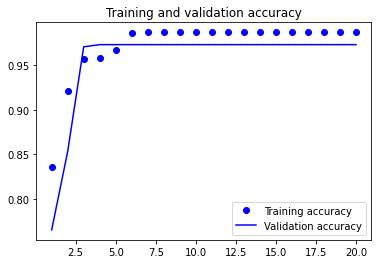

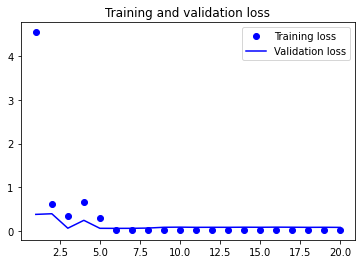

In [35]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

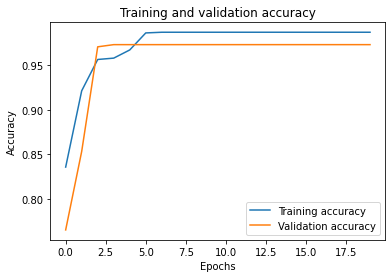

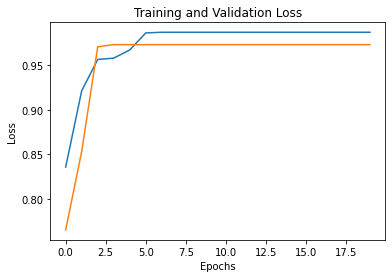

In [36]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot using Seaborn

plt.plot(history.history['accuracy'], label="Training loss")
plt.plot(history.history['val_accuracy'], label="Validation loss")
#my_plot = sns.lineplot(data=history[["loss","validation_loss"]])
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()

In [37]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 1s 63ms/step - loss: 0.0497 - accuracy: 0.9732


[0.04971083998680115, 0.9731707572937012]

In [38]:
model.save('brain_tumor.h5')

In [39]:
import numpy as np
import pandas as pd


In [40]:
y_pred = model.predict(X_test, verbose=0)


In [41]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

In [42]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

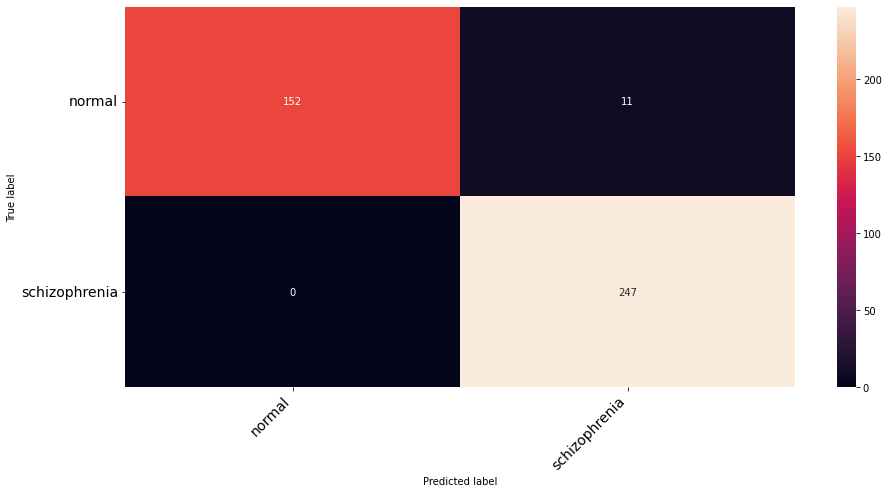

In [43]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (15,7), fontsize=14)

In [44]:
# From categorical outputs to discrete values

y_pred_ = [np.argmax(y) for y in y_pred]
y_test_ = [np.argmax(y) for y in y_test]

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       163
           1       0.96      1.00      0.98       247

    accuracy                           0.97       410
   macro avg       0.98      0.97      0.97       410
weighted avg       0.97      0.97      0.97       410

